# Assignment 4 - Unsupervised Learning: Dimensionality Reduction, Clustering

Rabin Adhikari
7072310
raad00002@stud.uni-saarland.de

Dhimitrios Duka
7059153
dhdu00001@stud.uni-saarland.de

# Instructions

This assignment is worth a total of **10 points**. The goal of this assignment is to introduce you to clustering and dimensionality reduction techniques. 

We have structured the assignment into two major parts:

1. **Part One**: Clustering technique
2. **Part Two**: Dimensionality reduction (PCA)

To install any unavailable package, you can do it similarly to the previous assignment.



# Part One: Clustering,  <span style="color:green">total of 6.5 points </span> 


In [1]:
## Import Necessary Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

random_state = 42

### Clustering the digits dataset

In this assignment, you will work with the Digits dataset from scikit-learn, which consists of 8x8 pixel images of handwritten digits (0-9). 
Each datapoint is a 8x8 image of a digit.

    =================   ==============
    Classes                         10
    Samples per class             ~180
    Samples total                 1797
    Dimensionality                  64
    Features             integers 0-16
    =================   ==============

### Load the dataset

In [2]:
from sklearn.datasets import load_digits

# Load the Iris dataset
data = load_digits()

# Extract features (X) and target labels (y)
X = data.data
y = data.target  # True labels (for information only, not used later on)

### Visualize some sample digits

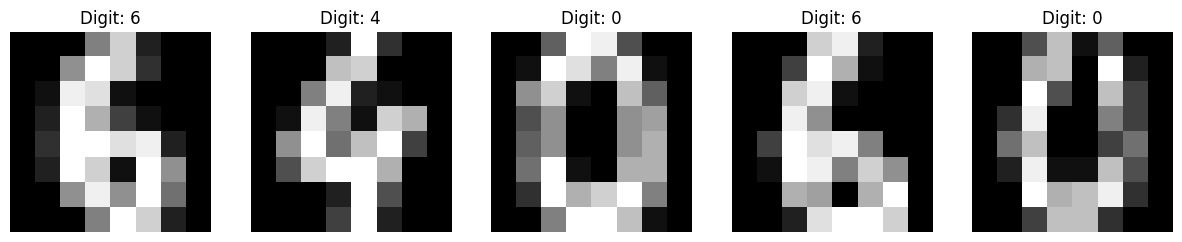

In [3]:
fig, axes = plt.subplots(1, 5, figsize=(15, 5))

for i in range(5):
    random_index = np.random.randint(
        0, len(X)
    )  # Choose a random index from the training set
    image = X[random_index].reshape(8, 8)  # Reshape the flat vector back to 8x8 image
    label = y[random_index]  # Get the corresponding label
    axes[i].imshow(image, cmap="gray")
    axes[i].set_title(f"Digit: {label}")
    axes[i].axis("off")

plt.show()

### Finding the optimal $k$ in the K-means cluster model

We will try using the elbow heuristic ($k \in [1,30]$) to determine the number of clusters in this dataset.

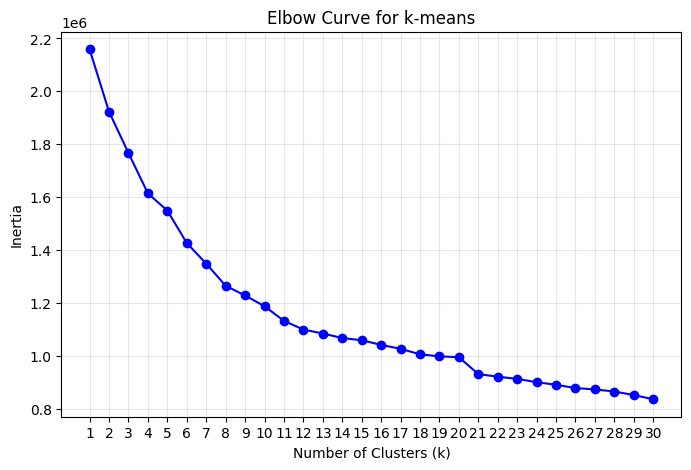

In [4]:
upper_bound_k = 30
inertia = []  # List to store inertia values for each k
# Calculate inertia for each number of clusters
for k in range(1, upper_bound_k + 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)  # Fit the model to the data
    inertia.append(kmeans.inertia_)  # Store the inertia

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, upper_bound_k + 1), inertia, marker="o", linestyle="-", color="b")
plt.title("Elbow Curve for k-means")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.xticks(range(1, upper_bound_k + 1))
plt.grid(alpha=0.3)
plt.show()

### <span style="color:red">Task 1: Answer the following questions</span>

1. **Do clustering algorithms (like $k$-means) take into account the number of classes or the value of the labels in a dataset?**

    Answer: The clustering algorithms are unsupervised and do not explicitly take the targets into account. However, they might cluster the data points with the same classes together.

2. **How might variations in handwriting, such as different writing styles, pen types, or stroke patterns, affect the clustering of digits? Can a single class (e.g., the digit '8') appear in more than one cluster?**

    Answer: The clustering algorithms find the pattern in the data points without knowing the actual targets. So they may cluster the digits on the basic of their pen types, stroke patterns, tilts, etc., which may result on the data points with the same labels to appear on different clusters.

3. **Can one cluster contain data points from multiple classes (e.g., digits '5' and '8')?**

    Yes, it is possible for one cluster to contain data points from multiple classes. This is especially noticeable in the early iterations of the algorithm, when it has not yet converged. However, since achieving a perfect clustering is highly unlikely, it may also occur that even after the algorithm has converged, a single cluster still contains data points from different classes.

4. **Is the elbow method an entirely objective way to determine the optimal number of clusters $k$?**

    Answer: There is an element of subjectivity for the elbow-method. What drop in dissimilarity (inertia in above figure) to consider significant is dependent upon the observer. However, the elbow method can act as a guide to find the subset of values of  𝑘  to choose from.
#### <span style="color:green">Total: 3 points </span> 


### Clustering as a preprocessing step / semi-supervised learning

Clustering can also be used as a preprocessing step to help improve your classifier. For instance, in spatial data (e.g. data from GPS) it is possible to create new features by using the distance from the centroids. In this case, you use clustering to help with having limited data. We will work on the same Digits dataset from scikit-learn. 

    =================   ==============
    Classes                         10
    Samples per class             ~180
    Samples total                 1797
    Dimensionality                  64
    Features             integers 0-16
    =================   ==============

### Load the Digits Dataset

In [5]:
from sklearn.datasets import load_digits


X_digits, y_digits = load_digits(return_X_y=True)
# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X_digits, y_digits, test_size=0.7, random_state=random_state
)


### Train a LogisticRegression model on the whole dataset

In [6]:
initial_classifier = LogisticRegression(max_iter=10_000, random_state=random_state)
initial_classifier.fit(X_train, y_train)

print(
    f"Mean accuracy on the given test dataset:\n {initial_classifier.score(X_test, y_test)}"
)

Mean accuracy on the given test dataset:
 0.9475357710651828


### <span style="color:red">Task 2: Train a LogisticRegression model on a reduced version of the dataset</span>


In this step, we will first train a Logistic Regression classifier on a smaller labeled sample of the Digits dataset. In typical machine learning scenarios, having a fully labeled dataset is crucial, but in some contexts, we may only have a small labeled subset, while the rest of the dataset remains unlabeled. This situation is commonly referred to as semi-supervised learning. Let's assume we only have the first 50 out of 1800 digits classified.

#### <span style="color:green">Total: 1 point </span> 

In [7]:
n_labeled = 50
limited_classifier = LogisticRegression(max_iter=10_000, random_state=random_state)
# TODO: fit the classifier using the first 50 data (use n_labeled)
limited_classifier.fit(X_train[:n_labeled], y_train[:n_labeled])

print(
    f"Mean accuracy of the classifier using only {n_labeled} datapoints, on the given test dataset:\n {limited_classifier.score(X_test, y_test)}"
)

Mean accuracy of the classifier using only 50 datapoints, on the given test dataset:
 0.7965023847376789


### <span style="color:red">Task 3: Training on the representative points</span>

Now for the next experiment, we will use k-Means clustering to group the unlabeled data. After clustering, we will obtain the closest points to the cluster centroids. Then we will "label" these representative points and train a classifier. For a fair comparison, we will use 50 data points in this case too. 

(Note: K-medoids would have been a valid choice too)

#### <span style="color:green">Total: 1.25 points </span> 

In [8]:
from sklearn.cluster import KMeans

# Fit Kmeans to the data
k = 50  # TODO: number of clusters?
kmeans = KMeans(n_clusters=k, n_init=10, random_state=random_state)
kmeans.fit(X_train)

# compute the distance from each point to each cluster centroid
X_digits_distances = kmeans.transform(X_train)


representative_digit_idx = np.argmin(X_digits_distances, axis=0) # TODO: # get the indices of the representative (closest) data points

# get the data points represented by those indices
X_representative_digits = X_train[representative_digit_idx]

# get the class labels of the representative data points
y_representative_digits = y_train[representative_digit_idx]  # TODO: # get the class labels of the representative data points

### Visualize the representative digit images (one per cluster)

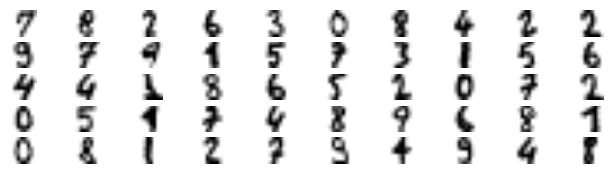

The labels of these representative digits are: 
 [7 8 2 6 3 0 8 4 2 2 9 7 9 1 5 7 3 1 5 6 4 4 1 8 6 5 2 0 7 2 0 5 1 7 4 8 9
 6 8 1 0 8 1 2 7 9 4 9 4 8]


In [9]:
plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(
        X_representative_digit.reshape(8, 8), cmap="binary", interpolation="bilinear"
    )
    plt.axis("off")

plt.show()

print(f"The labels of these representative digits are: \n {y_representative_digits}")

### Train the model on the new representative dataset

In [10]:
cluster_log_reg = LogisticRegression(max_iter=10_000)
cluster_log_reg.fit(X_representative_digits, y_representative_digits)

print(
    f"Mean accuracy of the classifier using only {n_labeled} representative data points, on the given test dataset:\n {cluster_log_reg.score(X_test, y_test)}"
)

Mean accuracy of the classifier using only 50 representative data points, on the given test dataset:
 0.8783783783783784


### <span style="color:red">Task 4: Let's use all the data points</span>
We saw that even with 50 representative points we can get a performance boost. But what about the rest of data points? How could we automatically label the rest?

One extra step we can take is propagating labels to the remaining unlabeled data points using the cluster structure we’ve learned with KMeans. By assigning labels to the other data points based on the clusters they belong to, we can extend the labeled dataset without manually labeling every point.

#### <span style="color:green">Total: 1.25 points </span> 

In [11]:
# Create an empty array to hold the new "automatic" labels
y_train_automatic = np.empty(X_train.shape[0], dtype=np.int64)  # TODO: size of array?

# Assign to the empty array the correct values.
# TODO: use kmeans.labels_ and the labels of the representative digits
y_train_automatic = y_representative_digits[kmeans.labels_]

In [12]:
automatic_log_reg = LogisticRegression(max_iter=10_000)
automatic_log_reg.fit(X_train, y_train_automatic)

print(
    f"Accuracy using all data points: {initial_classifier.score(X_test, y_test):.4f}",
    f"\nAccuracy using the first 50 labelled data points: {limited_classifier.score(X_test, y_test):.4f}",
    f"\nAccuracy using the representative 50 data points: {cluster_log_reg.score(X_test, y_test):.4f}"
    f"\nAccuracy using all automatically labeled data points: {automatic_log_reg.score(X_test, y_test):.4f}",
)


Accuracy using all data points: 0.9475 
Accuracy using the first 50 labelled data points: 0.7965 
Accuracy using the representative 50 data points: 0.8784
Accuracy using all automatically labeled data points: 0.8967


# Part Two: Dimensionality Reduction, <span style="color:green">total of 3.5 points </span> 



In the second part of this assignment, you will apply PCA for dimensionality reduction and then followed by a classification task. As you may have already seen in the lecture, PCA is a good technique that allows us find the k-dimensional representation of the data that maximizes the variance of the data. As such it is possible to reduce the dimension of the data while still maintianing the most important properties of the sample. We will still work with the digits datasets used in part one.




In [13]:
# Reload the Digits dataset
data = load_digits()
X = data.data
y = data.target

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)
X_train, X_val, Y_train, Y_val = train_test_split(
    X_train, Y_train, test_size=0.125, random_state=42
)

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [17]:
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

### <span style="color:red">Task 5: You will need to complete this function by performing PCA and followed by logistic regression</span>

#### <span style="color:green">Total: 2.5 points </span> 


In [18]:

def evaluate_pca_accuracy(X_train, Y_train, X_val, Y_val, n_components_list):
    """Evaluate accuracy of Logistic Regression with different numbers of PCA components."""
    train_accuracies = []
    val_accuracies = []

    for n_components in n_components_list:
        #TODO: Apply PCA
        pca = PCA(n_components=n_components, random_state=random_state).fit(X_train)
        X_train_pca = pca.transform(X_train) #TODO: Apply PCA to train
        X_val_pca = pca.transform(X_val) #TODO: Apply PCA to val

        
        #TODO: Train Logistic Regression model
        clf = LogisticRegression(max_iter=10000, random_state=random_state) #TODO: Train Logistic Regression model
        clf.fit(X_train_pca, Y_train)

        train_pred = clf.predict(X_train_pca)
        val_pred   = clf.predict(X_val_pca)  #TODO: predictions

        train_accuracy = accuracy_score(Y_train, train_pred) #TODO: Evaluate accuracy
        val_accuracy = accuracy_score(Y_val, val_pred) #TODO: Evaluate accuracy

        train_accuracies.append(train_accuracy)
        val_accuracies.append(val_accuracy)

    return train_accuracies, val_accuracies

In [19]:
n_components_list = [2, 5, 10, 20, 30, 40, 50, 60]
train_accuracies, val_accuracies = evaluate_pca_accuracy(
    X_train, Y_train, X_val, Y_val, n_components_list
)

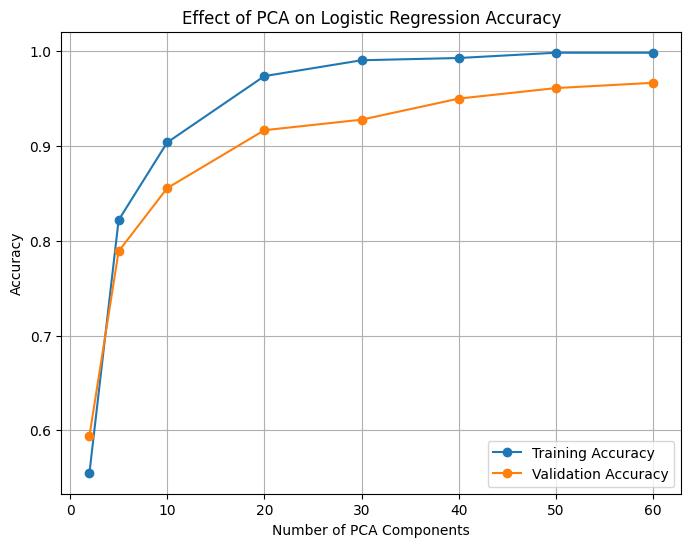

In [20]:
plt.figure(figsize=(8, 6))
# TODO:Plot the training accuracies with marker = 'o'
plt.plot(n_components_list, train_accuracies, marker='o', label='Training Accuracy')
# TODO:Plot the validation accuracies with marker = 'o'
plt.plot(n_components_list, val_accuracies, marker='o', label='Validation Accuracy')
plt.xlabel("Number of PCA Components")
plt.ylabel("Accuracy")
plt.title("Effect of PCA on Logistic Regression Accuracy")
plt.legend()
plt.grid(True)
plt.show()

In [21]:
train_accuracies

[0.5552903739061257,
 0.8217979315831344,
 0.903739061256961,
 0.9737470167064439,
 0.9904534606205251,
 0.9928400954653938,
 0.9984089101034208,
 0.9984089101034208]

In [22]:
val_accuracies

[0.5944444444444444,
 0.7888888888888889,
 0.8555555555555555,
 0.9166666666666666,
 0.9277777777777778,
 0.95,
 0.9611111111111111,
 0.9666666666666667]

### <span style="color:red">Task 6: Select the optimal number of PCA components based on the plot and justify your chocie in terms of model complexity.
 </span>
 
 
#### <span style="color:green">Total: 1 point </span> 



Answer: We can choose the model with  50  principal components because there is the difference of only  0.005  with that of  60  components but the computational benefit is higher. If we have even more computation constraint, we can even opt-in for  40  principal components, with a reduction of  0.016  accuracy.